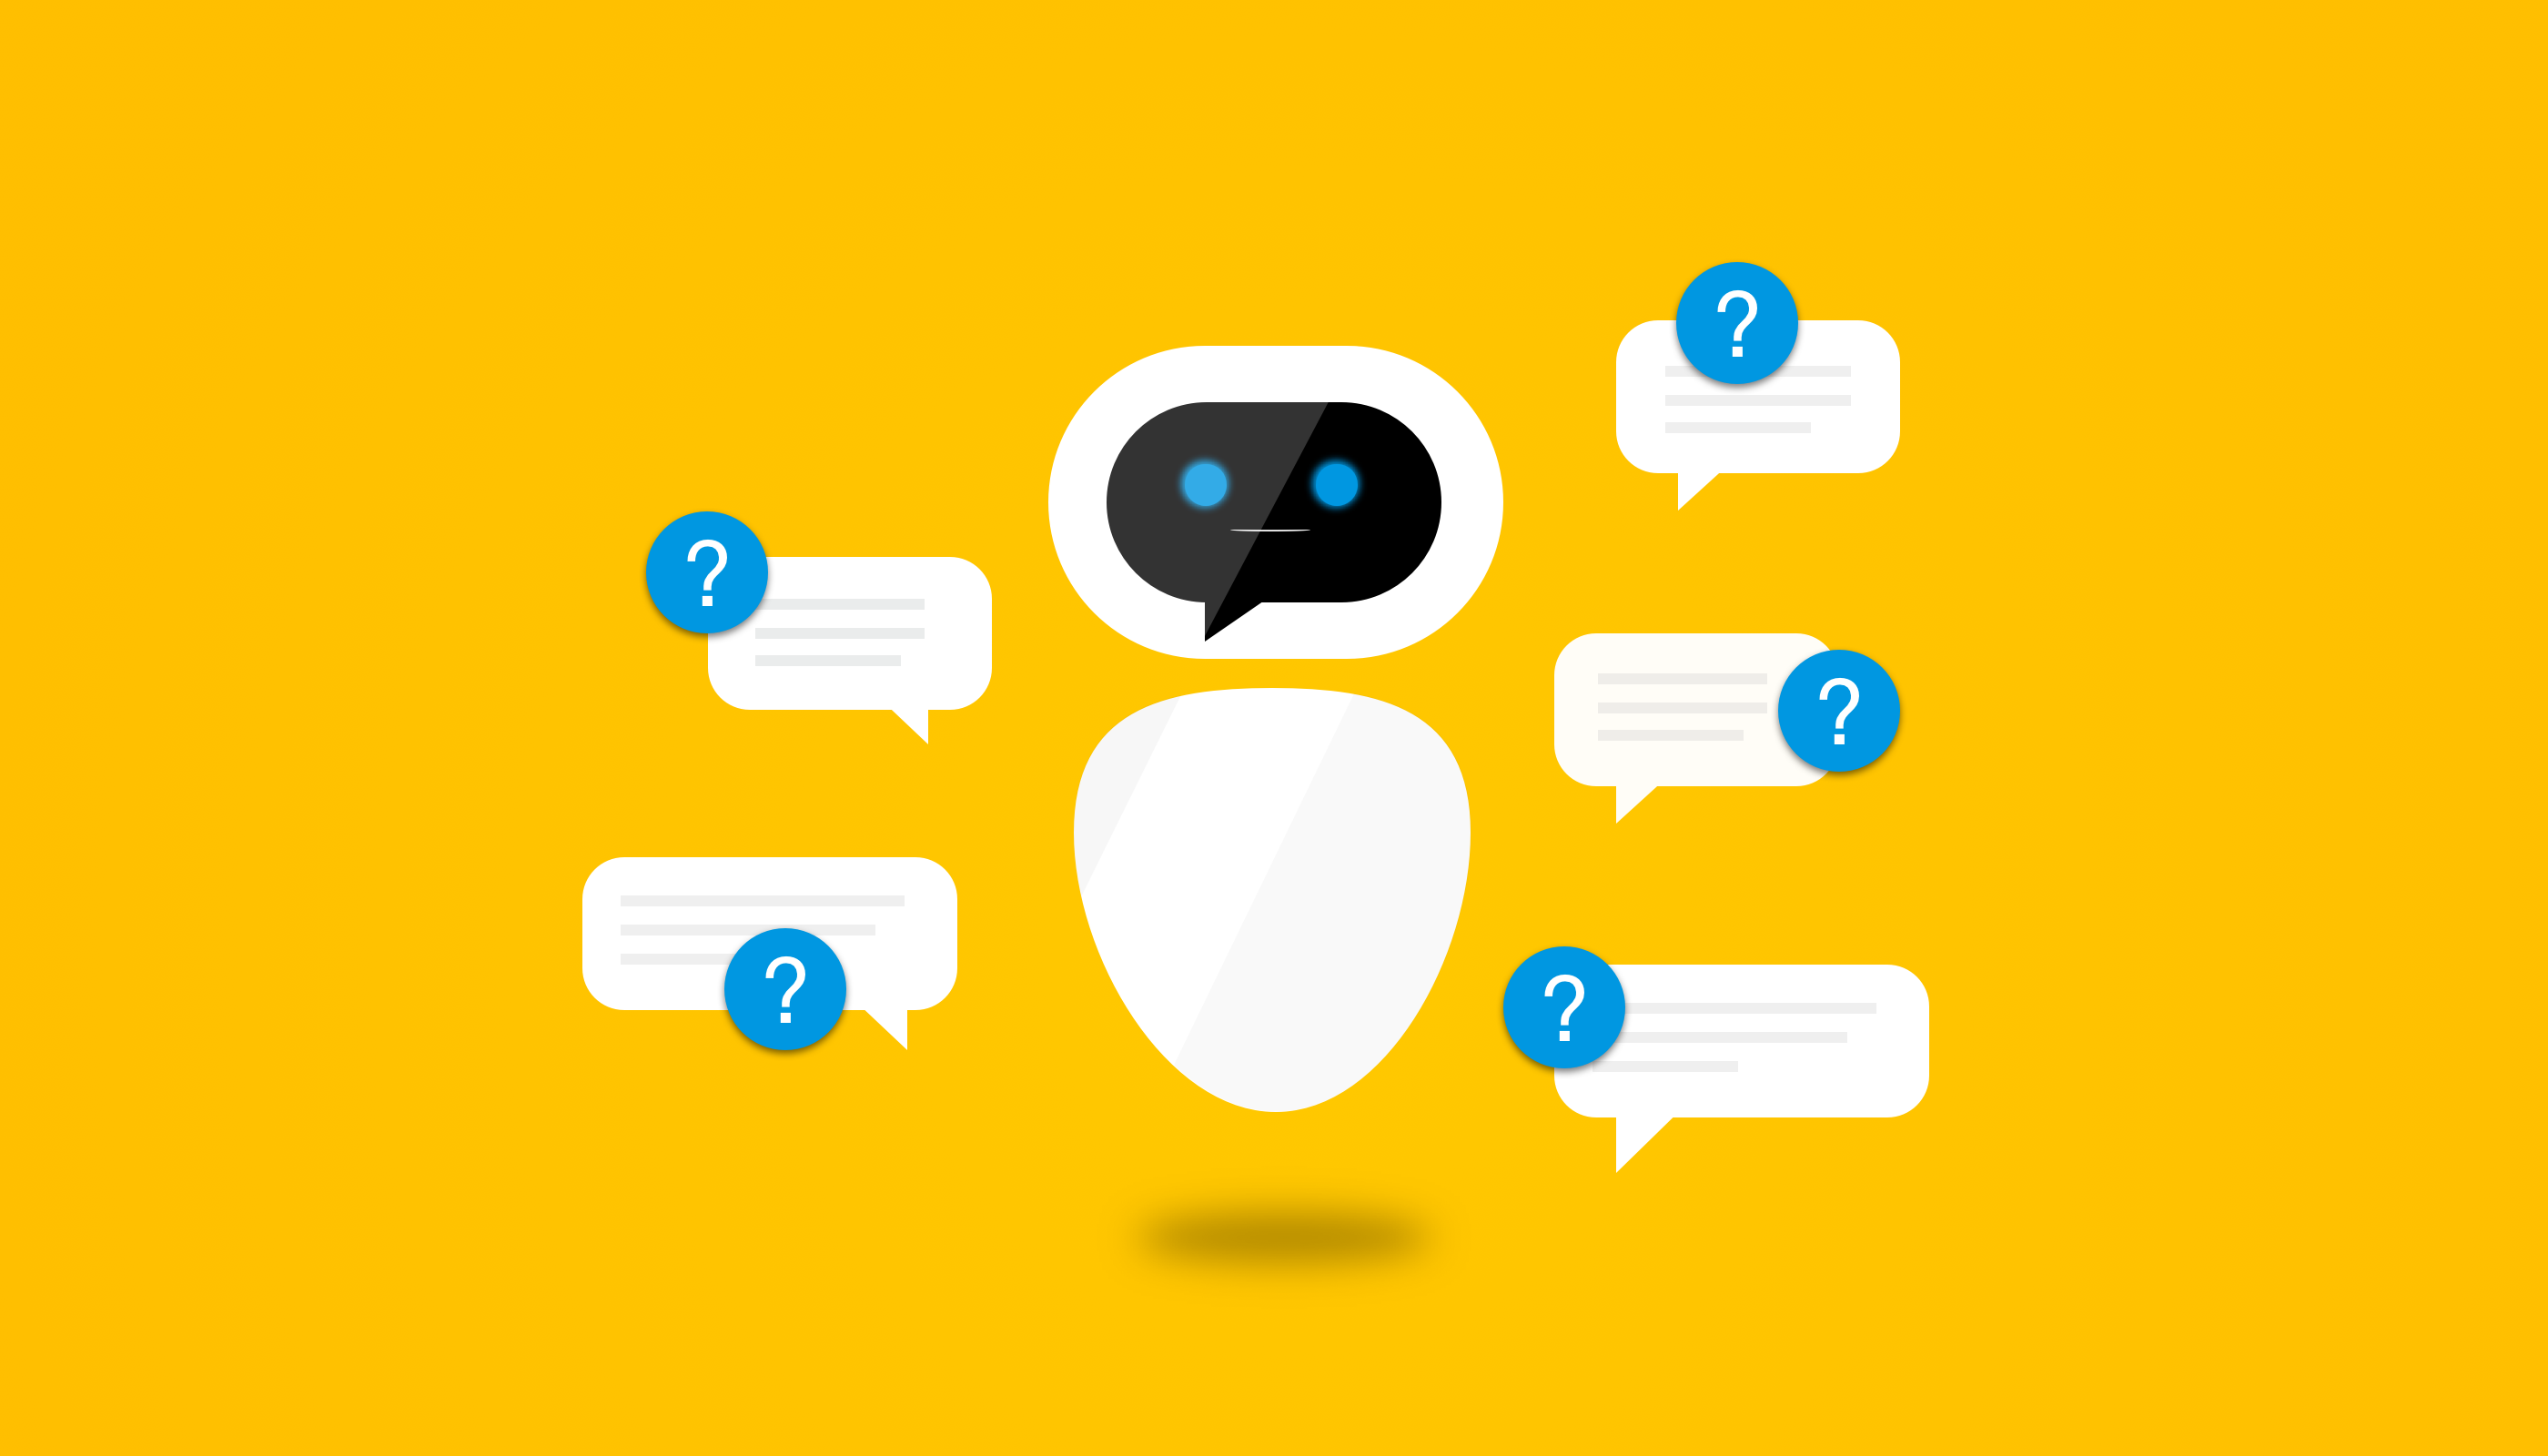


# How Does a Chatbot Work?

Since we will be developing a Chatbot with Python using Machine Learning, we need some data to train our model. But we’re not going to collect or download a large dataset since this is just a chatbot. We can just create our own dataset to train the model.

To create this dataset to create a chatbot with Python, we need to understand what intents we are going to train. An “intention” is the user’s intention to interact with a chatbot or the intention behind every message the chatbot receives from a particular user.

Therefore, it is important to understand the good intentions of your chatbot depending on the domain you will be working with. So why does he need to define these intentions? This is a very important point to understand.
 
In order to answer questions asked by the users and perform various other tasks to continue conversations with the users, the chatbot really needs to understand what users are saying or having ‘intention to do. This is why your chatbot must understand the intentions behind users’ messages.

How can you get your chatbot to understand the intentions so that users feel like they know what they want and provide accurate answers? The strategy here is to set different intents and create training samples for those intents and train your chatbot model with these sample training data as model training data (X) and intents in as model training categories (Y).

# Data preparation:

The second step of this task to create a chatbot with Python and Machine Learning is to prepare the data to train our chatbot. I’ll start this step by importing the necessary libraries and packages:

In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [2]:
with open('intents.json') as file:
    data = json.load(file)
    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [3]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [4]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

# Training a Neural Network

Now the next and most important step in the process of building a chatbot with Python and Machine Learning is to train a neural network. Now, I will train and create a neural network to train our chatbot

In [5]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
Total params: 16,680
Trainable params: 16,680
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 1s 0s/step - loss: 2.0769 - accuracy: 0.2039
Epoch 2/500
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 1.8497 - accuracy: 0.2652
Epoch 158/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8448 - accuracy: 0.2652
Epoch 159/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8390 - accuracy: 0.2756
Epoch 160/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8285 - accuracy: 0.2756
Epoch 161/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8300 - accuracy: 0.3368
Epoch 162/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8220 - accuracy: 0.3368
Epoch 163/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8280 - accuracy: 0.3264
Epoch 164/500
2/2 [==============================] - ETA: 0s - loss: 1.8199 - accuracy: 0.34 - 0s 0s/step - loss: 1.8186 - accuracy: 0.3368
Epoch 165/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8113 - accuracy: 0.3368
Epoch 166/500
2/2 [==============================] - 0s 8ms/step - loss: 1.8067 - 

2/2 [==============================] - 0s 8ms/step - loss: 1.1295 - accuracy: 0.5407
Epoch 322/500
2/2 [==============================] - 0s 16ms/step - loss: 1.1117 - accuracy: 0.5818
Epoch 323/500
2/2 [==============================] - 0s 0s/step - loss: 1.1043 - accuracy: 0.5818
Epoch 324/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0990 - accuracy: 0.5818
Epoch 325/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0913 - accuracy: 0.5511
Epoch 326/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0850 - accuracy: 0.5511
Epoch 327/500
2/2 [==============================] - 0s 0s/step - loss: 1.0775 - accuracy: 0.5511
Epoch 328/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0719 - accuracy: 0.5511
Epoch 329/500
2/2 [==============================] - 0s 0s/step - loss: 1.0723 - accuracy: 0.5511
Epoch 330/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0691 - accuracy: 0.5511
Epoch 331/500
2/2 [=======

2/2 [==============================] - 0s 0s/step - loss: 0.6143 - accuracy: 0.8775
Epoch 486/500
2/2 [==============================] - 0s 0s/step - loss: 0.6132 - accuracy: 0.8775
Epoch 487/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6119 - accuracy: 0.8775
Epoch 488/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6043 - accuracy: 0.8775
Epoch 489/500
2/2 [==============================] - 0s 0s/step - loss: 0.6072 - accuracy: 0.9081
Epoch 490/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6017 - accuracy: 0.9081
Epoch 491/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6088 - accuracy: 0.9081
Epoch 492/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6090 - accuracy: 0.9081
Epoch 493/500
2/2 [==============================] - 0s 0s/step - loss: 0.6057 - accuracy: 0.9081
Epoch 494/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6062 - accuracy: 0.9081
Epoch 495/500
2/2 [=========

# Saving The Neural Network:

We’ve trained the model, but before we go any further in the process of building a chatbot with Python and Machine Learning, let’s save the model so that we can use this neural network in the future as well

In [6]:
# to save the trained model
model.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model\assets


Now let’s Build a Chatbot with Python and our Trained Machine Learning Model

Now I am going to implement a chat function to interact with a real user. When the message from the user will be received, the chatbot will compute the similarity between the sequence of the new text and the training data.

Taking into account the trust scores obtained for each category, it categorizes the user’s message according to an intention with the highest trust score

In [ ]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: Hi
ChatBot: Hi there
User: Hello
ChatBot: Hello
User: What`s your name?
ChatBot: Just call me as Joana
User: My name is Lauro
ChatBot: Hi
User: Can you help me?
ChatBot: Tell me your problem to assist you
User: I cant pee
ChatBot: Hello
User: Yes
ChatBot: Hi
User: bye
ChatBot: Any time!
User: hi
ChatBot: Hello
User: Joana?
ChatBot: Hello
User: What is your name?
ChatBot: I'm Joana!
User: What is my name?
ChatBot: Just call me as Joana
User: Oi tudo bem?
ChatBot: Hi
User: Como voce poderia me ajudar?
ChatBot: Tell me how can assist you
User: What can you do?
ChatBot: Yes Sure, How can I support you
User: 